In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.layers import Dense
from keras.models import Sequential
sns.set_style("whitegrid")
dataset=pd.read_csv("test.csv")
dataset

,Brand,Model,Type,Gender,Size,Color,Material,Price (USD)
0,Nike,Air Jordan 1,Basketball,Men,US 10,Red/Black,Leather,170.0
1,Adidas,Ultra Boost 21,Running,Men,US 9.5,Black,Primeknit,180.0
2,Reebok,Classic Leather,Casual,Men,US 11,White,Leather,75.0
3,Converse,Chuck Taylor,Casual,Women,US 8,Navy,Canvas,55.0
4,Puma,Future Rider,Lifestyle,Women,US 7.5,Pink,Mesh,80.0
...,...,...,...,...,...,...,...,...
1001,New Balance,Fresh Foam 880v11,Running,Women,US 10,Grey,Mesh,130.0
1002,Asics,Gel-Kayano Lite,Running,Men,US 9.5,Black,Mesh,160.0
1003,Fila,Venom 94,Fashion,Women,US 7.5,White,Leather,70.0
1004,Skechers,Summits,Training,Men,US 8,Grey,Mesh,55.0


In [2]:
y=dataset[["Price (USD)"]]
y
X=dataset[["Brand","Model","Type","Gender","Size","Color","Material"]]
X

,Brand,Model,Type,Gender,Size,Color,Material
0,Nike,Air Jordan 1,Basketball,Men,US 10,Red/Black,Leather
1,Adidas,Ultra Boost 21,Running,Men,US 9.5,Black,Primeknit
2,Reebok,Classic Leather,Casual,Men,US 11,White,Leather
3,Converse,Chuck Taylor,Casual,Women,US 8,Navy,Canvas
4,Puma,Future Rider,Lifestyle,Women,US 7.5,Pink,Mesh
...,...,...,...,...,...,...,...
1001,New Balance,Fresh Foam 880v11,Running,Women,US 10,Grey,Mesh
1002,Asics,Gel-Kayano Lite,Running,Men,US 9.5,Black,Mesh
1003,Fila,Venom 94,Fashion,Women,US 7.5,White,Leather
1004,Skechers,Summits,Training,Men,US 8,Grey,Mesh


In [3]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
dummy_x=pd.get_dummies(X)
dummy_x

C:\Users\Marketing\anaconda3\envs\deepl2\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,Brand_Adidas,Brand_Asics,Brand_Converse,Brand_Fila,Brand_New Balance,Brand_Nike,Brand_Puma,Brand_Reebok,Brand_Skechers,Brand_Vans,...,Material_Suede/Leather,Material_Suede/Mesh,Material_Suede/Nylon,Material_Suede/Textile,Material_Synthetic,Material_Synthetic/Leather,Material_Synthetic/Mesh,Material_Synthetic/Textile,Material_Textile,Material_Textile/Leather
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1002,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1003,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


C:\Users\Marketing\anaconda3\envs\deepl2\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


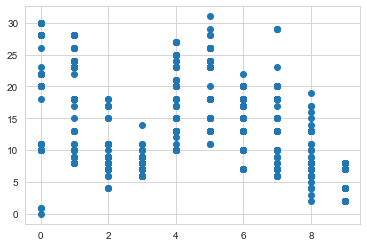

In [4]:
X1=dataset[["Brand"]]
X1=le.fit_transform(X1)
plt.scatter(X1,y)
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(dummy_x,y,test_size=0.2,random_state=0)
y.reshape(-1,1)

array([[26],
       [28],
       [ 9],
       ...,
       [ 8],
       [ 4],
       [26]], dtype=int64)

In [6]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [7]:
y_pred = model.predict(x_test)
y_pred

array([13, 30, 10, 24,  8, 13, 24, 13, 20, 22, 24, 13,  8, 18,  6,  2, 10,
        7, 17, 18, 22,  6,  8, 15, 24,  9,  8, 11, 11, 28, 24, 24, 13, 20,
       20,  7, 24, 28, 18, 13,  9, 24, 18, 20,  8, 22,  7,  8, 10,  8, 15,
       18,  6, 26, 13, 13, 13, 18,  7, 13,  7,  7, 13,  7,  7, 11, 22, 10,
        7,  9, 13,  2,  9, 20,  7, 15,  7, 20, 24, 13,  9,  7,  6,  9, 24,
        7, 17, 13, 21, 20, 28, 11, 26, 25, 10, 20, 18, 27,  7, 15,  8,  7,
        7, 13, 20,  2, 13, 20, 18, 20, 15,  6,  7,  2, 18, 22, 18,  7,  7,
       10, 13, 20, 13, 28, 13, 20, 13, 15, 13, 24, 28, 13, 24,  8, 20, 18,
       10,  7,  8,  2, 15, 23, 13, 21,  2, 20, 15, 30, 20, 17,  9, 23, 10,
        2, 20,  7, 13, 18,  8, 18,  7, 20, 13, 20, 10,  9,  2,  9, 20,  2,
       15,  2, 11, 10, 24, 18,  8, 15, 11, 18, 22,  7, 20, 24, 24, 24,  7,
       23, 13, 11,  7,  7, 13,  8, 11, 18, 13, 10, 22,  9, 18, 30],
      dtype=int64)

In [8]:
y_test

array([15, 30, 10, 24, 17, 13, 18,  9, 20, 22, 24, 13,  8, 18,  6,  4, 10,
        6, 17, 18, 26,  7,  8, 13, 24,  9,  8, 10, 11, 28, 24, 18, 15, 20,
       20,  7, 24, 28, 23, 13,  8, 24, 18, 20,  7, 20,  7,  4, 11,  8, 27,
       18,  6, 26, 13, 13, 11, 11, 11, 18, 13,  8, 13,  6,  7, 11, 22, 13,
        7,  8, 13,  4,  9, 20,  7, 18,  7, 20, 24, 13,  7,  4,  7,  9, 23,
        9, 17, 13, 21, 20, 28, 10, 26, 25, 10, 20, 18, 27,  6, 15,  8,  9,
        8, 13, 20,  2, 15, 20, 15, 20, 15,  6,  7,  4, 15, 20,  9,  9,  7,
       10, 13, 20, 13, 28, 13, 20, 13, 15, 13, 24, 28, 13, 24,  8, 22, 23,
       13,  7,  8,  2, 29, 24, 10, 21,  2, 13, 18, 30, 20, 13,  7, 23, 13,
        2, 13,  7, 13, 18,  9, 24,  7, 20, 13, 20, 10,  9,  2,  9, 20,  2,
       15,  2, 11, 18, 24, 13,  7, 15, 11, 18, 22,  8, 20, 24, 24, 24,  7,
       23, 13, 10,  6,  7, 13,  7, 11, 18, 13,  9, 20,  9, 18, 30],
      dtype=int64)

In [9]:
model.score(x_train,y_train)

0.8544776119402985

In [10]:
model.coef_

array([[ 5.75914559e-01, -8.30307791e-02, -5.42622673e-02, ...,
        -1.93986062e-03, -2.28469600e-03, -3.88412343e-04],
       [ 7.53831175e-01, -1.00631785e-01, -7.18398272e-02, ...,
        -3.14898130e-03, -3.38404706e-03, -3.99762687e-04],
       [-1.90356926e-01, -2.16335529e-01, -7.09692510e-01, ...,
        -7.14004889e-03, -2.99989009e-03, -1.87020450e-03],
       ...,
       [-8.81720009e-02, -9.07171826e-02, -7.58145699e-02, ...,
        -6.15461084e-03, -9.26398249e-04, -2.63023002e-03],
       [ 1.46318931e+00, -1.23480535e-01, -1.30961955e-01, ...,
        -1.20030249e-02, -1.83239462e-02, -2.69183140e-03],
       [-4.78150014e-02, -1.27386636e-01, -3.23486196e-02, ...,
        -1.62296678e-03, -4.58571431e-04, -8.33898380e-04]])